In [1]:
import pandas as pd 

df_original = pd.read_csv("../input/wine-reviews/winemag-data_first150k.csv")
df_original.head()

,Unnamed: 0,country,description,designation,points,price,province,region_1,region_2,variety,winery
0,0,US,This tremendous 100% varietal wine hails from ...,Martha's Vineyard,96,235.0,California,Napa Valley,Napa,Cabernet Sauvignon,Heitz
1,1,Spain,"Ripe aromas of fig, blackberry and cassis are ...",Carodorum Selección Especial Reserva,96,110.0,Northern Spain,Toro,NaN,Tinta de Toro,Bodega Carmen Rodríguez
2,2,US,Mac Watson honors the memory of a wine once ma...,Special Selected Late Harvest,96,90.0,California,Knights Valley,Sonoma,Sauvignon Blanc,Macauley
3,3,US,"This spent 20 months in 30% new French oak, an...",Reserve,96,65.0,Oregon,Willamette Valley,Willamette Valley,Pinot Noir,Ponzi
4,4,France,"This is the top wine from La Bégude, named aft...",La Brûlade,95,66.0,Provence,Bandol,NaN,Provence red blend,Domaine de la Bégude


In [2]:
df_original.shape 

(150930, 11)

<AxesSubplot:>

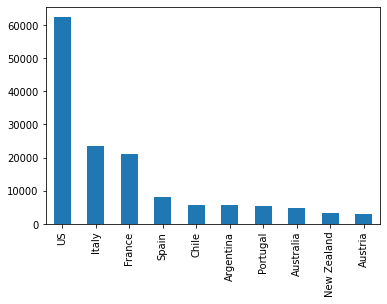

In [3]:
df_original['country'].value_counts().head(10).plot.bar()

<AxesSubplot:>

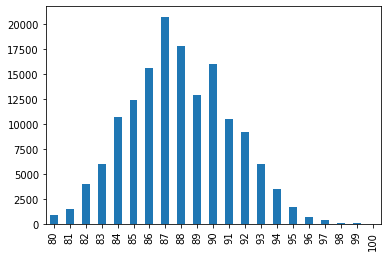

In [4]:
df_original['points'].value_counts().sort_index().plot.bar()

<AxesSubplot:>

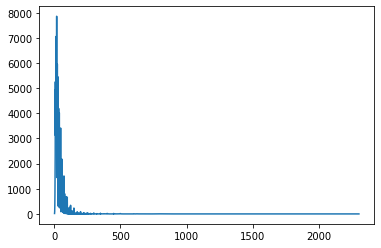

In [5]:
df_original['price'].value_counts().sort_index().plot.line()

<AxesSubplot:xlabel='points', ylabel='price'>

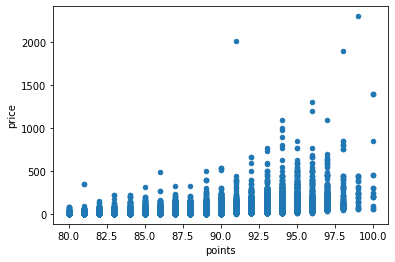

In [6]:
df_original.plot.scatter(x='points', y='price')

In [7]:
print("Price" + " " + str(list(df_original.price.isnull()).count(True)))
print("Region_2" + " " + str(list(df_original.region_2.isnull()).count(True)))

Price 13695
Region_2 89977


<AxesSubplot:xlabel='country', ylabel='count'>

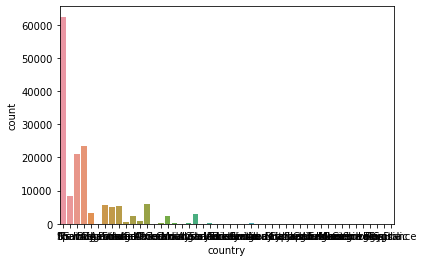

In [8]:
import seaborn as sns
sns.countplot(x= df_original['country'])

<AxesSubplot:xlabel='country', ylabel='count'>

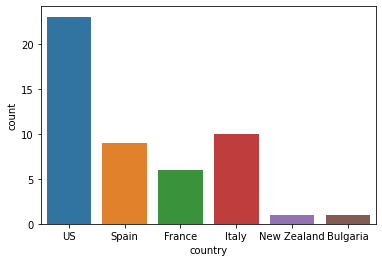

In [9]:
import seaborn as sns
sns.countplot(x= df_original['country'].head(50))

Text(0.5, 1.0, 'Price of Wine')

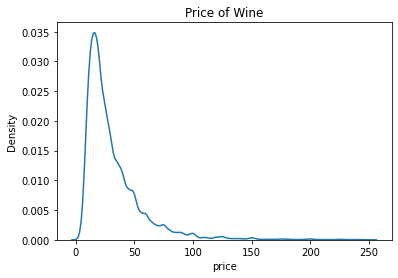

In [10]:
ax = sns.kdeplot(df_original.query('price < 250').price)
ax.set_title("Price of Wine")

/opt/conda/lib/python3.7/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


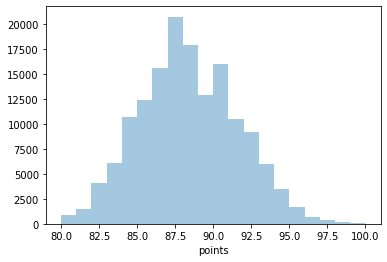

In [11]:
ax = sns.distplot(df_original['points'], bins = 20, kde = False)

<AxesSubplot:xlabel='variety', ylabel='points'>

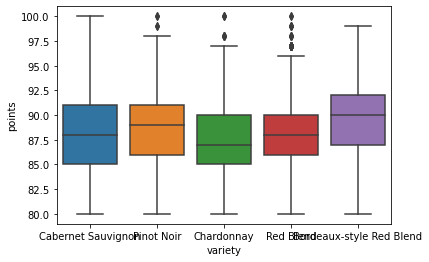

In [12]:
df1 = df_original[df_original.variety.isin(df_original.variety.value_counts().head(5).index)]
sns.boxplot(x = 'variety', y = 'points', data = df1)

In [13]:
df_original.mean(numeric_only = True)

Unnamed: 0    75464.500000
points           87.888418
price            33.131482
dtype: float64

In [14]:
df_original.median(numeric_only = True)

Unnamed: 0    75464.5
points           88.0
price            24.0
dtype: float64

In [15]:
df_original.mode(numeric_only = True)

,Unnamed: 0,points,price
0,0,87.0,20.0
1,1,NaN,NaN
2,2,NaN,NaN
3,3,NaN,NaN
4,4,NaN,NaN
...,...,...,...
150925,150925,NaN,NaN
150926,150926,NaN,NaN
150927,150927,NaN,NaN
150928,150928,NaN,NaN


In [16]:
df_original.var(numeric_only = True)

Unnamed: 0    1.898335e+09
points        1.038381e+01
price         1.319327e+03
dtype: float64

In [17]:
df_original.std(numeric_only = True)

Unnamed: 0    43569.882402
points            3.222392
price            36.322536
dtype: float64

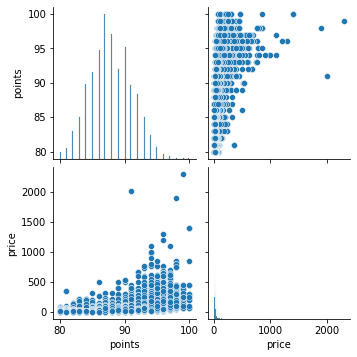

In [18]:
sns.pairplot(df_original[['points', 'price']])